In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('gurgon_property_outlier_treated.csv')

In [7]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
Area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 15
facing                  234
agePossession             0
nearbyLocations         173
furnishDetails          956
features                458
super_built_up_area    1768
built_up_area          2053
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
features_list             0
luxury_score              0
area_room_ratio           0
dtype: int64

## Built up Area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

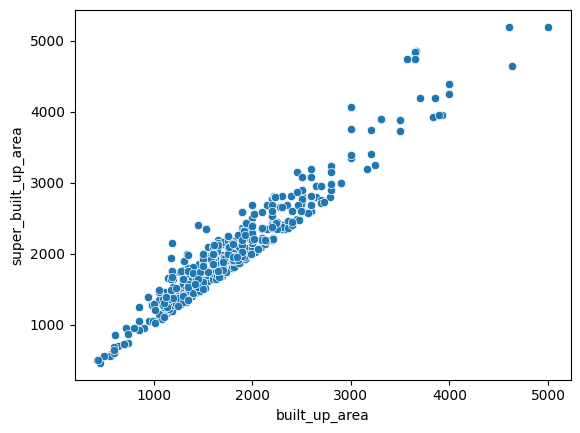

In [9]:
sns.scatterplot(x = df['built_up_area'], y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

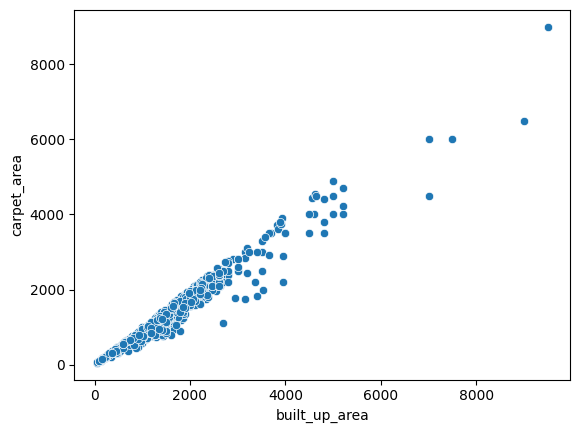

In [10]:
sns.scatterplot(x = df['built_up_area'], y = df['carpet_area'])

In [11]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3678    False
3679    False
3680    False
3681    False
3682    False
Length: 3683, dtype: bool

In [12]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [13]:
all_present_df.shape

(534, 30)

In [14]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [15]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [16]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1048701298701298 0.900140056022409


In [17]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [18]:
sbc_df.head()

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,area_room_ratio
7,7,flat,shapoorji pallonji joyville gurugram,sector 102,0.97,915.0,10601.0,Super Built up area 915(85.01 sq.m.)Carpet are...,2,2,2,not available,12.0,Na,New Property,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...","['1 Water Purifier', '1 Fan', '1 Geyser', '1 L...","['Feng Shui / Vaastu Compliant', 'Security / F...",915.0,NaN,600.0,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Security / F...",57,457.500000
11,11,flat,emaar mgf emerald estate,sector 65,1.30,631.0,20602.0,Super Built up area 1020(94.76 sq.m.)Carpet ar...,2,2,2,study room,7.0,West,Relatively New,"['Sector 53-54 Metro Station', 'Central Plaza ...",NaN,"['Private Garden / Terrace', 'Lift(s)', 'Maint...",1020.0,NaN,631.0,1,0,0,0,0,0,"['Private Garden / Terrace', 'Lift(s)', 'Maint...",78,315.500000
20,20,flat,ashiana anmol,sohna road,0.88,791.0,11125.0,Super Built up area 1275(118.45 sq.m.)Carpet a...,2,2,2,not available,13.0,East,Relatively New,"['Global Signum Plaza', 'Airia Mall', 'Sohna R...","['1 Water Purifier', '4 Fan', '1 Exhaust Fan',...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1275.0,NaN,791.0,0,0,0,0,0,1,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",127,395.500000
30,30,flat,puri emerald bay,sector 104,2.45,2450.0,10000.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,servant room,14.0,South,Relatively New,"['Sector-21 Metro Dwarka', 'Gurgaon Dreamz Mal...","['5 Fan', '3 Geyser', '5 Light', '5 AC', '1 Ch...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...",2450.0,NaN,1840.0,0,1,0,0,0,2,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...",56,816.666667
33,33,flat,vatika gurgaon,sector 83,1.25,1600.0,7812.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4,4,3,servant room,12.0,South-West,Moderately old,"['Huda Metro Station (Gurugram)', 'Sapphire 83...","['4 Fan', '5 Light', '3 Wardrobe', 'No AC', 'N...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",2390.0,NaN,1600.0,0,1,0,0,0,0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",103,400.000000


In [19]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_5500\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_5500\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [20]:
df.update(sbc_df)

In [21]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
Area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 15
facing                  234
agePossession             0
nearbyLocations         173
furnishDetails          956
features                458
super_built_up_area    1768
built_up_area          1625
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
features_list             0
luxury_score              0
area_room_ratio           0
dtype: int64

In [22]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df.head()

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,area_room_ratio
0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - So...","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'N...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",1789.0,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71,530.333333
9,9,flat,tata primanti,sector 72,4.10,2987.0,13726.0,Super Built up area 2550(236.9 sq.m.),3,3,3,servant room,8.0,Na,Moderately old,"['Sector 55-56 Metro Station', 'Omaxe City Cen...","['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Ch...","['Intercom Facility', 'Lift(s)', 'Swimming Poo...",2550.0,NaN,NaN,0,1,0,0,0,0,"['Intercom Facility', 'Lift(s)', 'Swimming Poo...",38,995.666667
15,15,flat,mapsko mount ville,sector 79,1.20,1490.0,8054.0,Super Built up area 1490(138.43 sq.m.),3,3,3,not available,24.0,West,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Lift(s)', 'Park']",1490.0,NaN,NaN,0,0,0,0,0,2,"['Lift(s)', 'Park']",8,496.666667
23,23,flat,vatika the seven lamps,sector 82,0.78,1315.0,5932.0,Super Built up area 1298(120.59 sq.m.),2,2,2,not available,0.0,North-West,Relatively New,"['SS Omnia Mall', 'Golf Course Ext Rd', 'Knowl...","['1 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1298.0,NaN,NaN,0,0,0,0,0,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",103,657.500000
38,38,flat,vatika seven elements,sector 89,1.60,1960.0,8163.0,Super Built up area 1960(182.09 sq.m.),3,3,3,not available,5.0,Na,New Property,"['Newtown Square Mall', 'Pataudi Road', 'Dwark...",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",1960.0,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",58,653.333333


In [24]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_5500\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_5500\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [25]:
df.update(sb_df)

In [26]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
Area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 15
facing                  234
agePossession             0
nearbyLocations         173
furnishDetails          956
features                458
super_built_up_area    1768
built_up_area           722
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
features_list             0
luxury_score              0
area_room_ratio           0
dtype: int64

In [27]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [28]:
c_df.head()

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,area_room_ratio
2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prat...","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...","['Lift(s)', 'Water purifier', 'Maintenance Sta...",NaN,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26,375.0
3,3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6723.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,Na,New Property,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36,297.5
14,14,flat,green court,sector 90,0.47,690.0,6812.0,Carpet area: 690 (64.1 sq.m.),2,2,1,not available,0.0,East,New Property,"['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","['3 Fan', '1 Exhaust Fan', '7 Light', 'No AC',...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,690.0,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Security / F...",49,345.0
22,22,flat,pioneer park,sector 61,1.60,1380.0,11594.0,Carpet area: 1380 (128.21 sq.m.),2,2,2,servant room,21.0,Na,Relatively New,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar...","['2 Wardrobe', 'No AC', 'No Bed', 'No Chimney'...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,1380.0,0,1,0,0,0,0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",105,690.0
24,24,flat,mrg world ultimus,sector 90,0.50,716.0,6983.0,Carpet area: 716 (66.52 sq.m.),2,2,2,not available,1.0,North-East,Undefined,"['Huda Metro Station', 'Aanyaz Mall', 'Sector ...",NaN,"['Lift(s)', 'Maintenance Staff', 'Water Storag...",NaN,NaN,716.0,0,0,0,0,0,0,"['Lift(s)', 'Maintenance Staff', 'Water Storag...",21,358.0


In [29]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_5500\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_5500\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet

In [30]:
df.update(c_df)

In [31]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
Area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 15
facing                  234
agePossession             0
nearbyLocations         173
furnishDetails          956
features                458
super_built_up_area    1768
built_up_area             0
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
features_list             0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

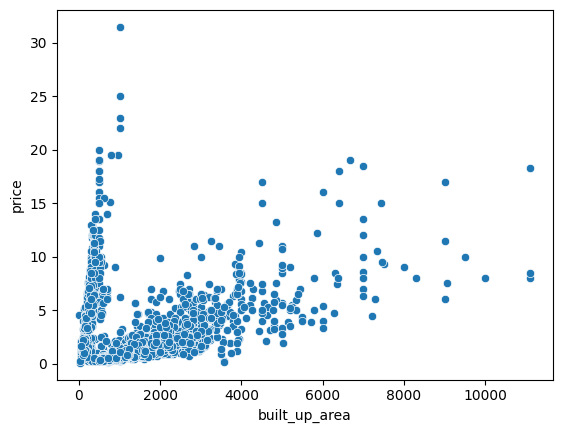

In [33]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [35]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','Area','built_up_area']]

In [36]:
anamoly_df.sample(5)

,price,Area,built_up_area
728,2.60,4986.0,616.0
3119,2.80,1950.0,1920.0
1829,11.29,3240.0,360.0
1493,3.65,1557.0,173.0
3263,3.60,1728.0,192.0


In [38]:
anamoly_df['built_up_area'] = anamoly_df['Area']

In [39]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

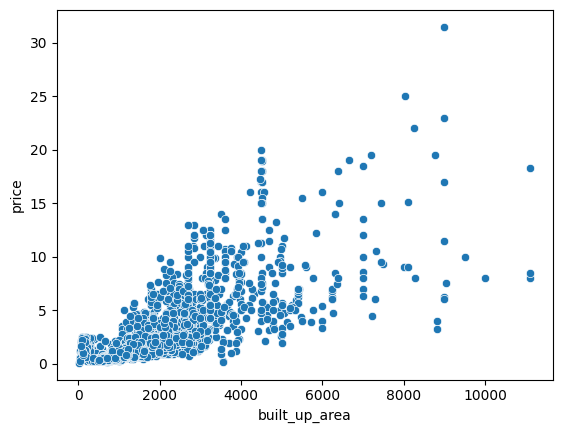

In [41]:
sns.scatterplot(x =df['built_up_area'],y = df['price'])

In [43]:
df.drop(columns=['Area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [44]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,flat,central park flower valley,sector 33,1.79,11251.0,3,3,3,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - So...","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'N...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",1619.0,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,house,satya the hermitage,sector 103,3.15,6702.0,4,5,0,not available,12.0,East,Undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro St...",NaN,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",4700.0,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,2,flat,not applicable,sector 4,0.42,5600.0,2,2,1,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prat...","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...","['Lift(s)', 'Water purifier', 'Maintenance Sta...",833.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,3,flat,tulsiani easy in homes,sohna road,0.40,6723.0,2,2,3,not available,12.0,Na,New Property,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",661.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,4,house,sector 57 huda,sector 57,3.80,26063.0,8,8,3+,"store room,pooja room",4.0,East,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm M...","['8 Wardrobe', '4 Fan', '1 Exhaust Fan', '12 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",1458.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


In [45]:
df.isnull().sum()

Unnamed: 0           0
property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
floorNum            15
facing             234
agePossession        0
nearbyLocations    173
furnishDetails     956
features           458
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
features_list        0
luxury_score         0
dtype: int64

### floorNum

In [47]:
df[df['floorNum'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
278,280,house,independent,sector 7,6.50,15046.0,3,2,3+,not available,NaN,NaN,Old Property,"['Geeta Nursing Home Gurgaon', 'Chiranjiv Hosp...",[],['Private Garden / Terrace'],4320.0,0,0,0,0,0,0,['Private Garden / Terrace'],9
546,549,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,"pooja room,servant room,store room",NaN,South-West,Relatively New,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...","['Feng Shui / Vaastu Compliant', 'Private Gard...",5200.0,0,1,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",114
695,698,house,independent,sector 25,13.00,45710.0,6,8,3+,"pooja room,servant room,study room,store room",NaN,NaN,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Esic...","['1 Water Purifier', '1 Fridge', '1 Sofa', '1 ...",NaN,2844.0,1,1,1,1,0,1,[],0
999,1004,house,jacob pura,sector 12,0.35,9722.0,2,1,0,not available,NaN,NaN,Old Property,NaN,[],NaN,360.0,0,0,0,0,0,0,[],0
1042,1048,house,independent,sector 4,0.65,11111.0,4,2,2,not available,NaN,NaN,Moderately old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['1 Wardrobe', '1 Exhaust Fan', '10 Light', '1...",NaN,65.0,0,0,0,0,0,0,[],0
1111,1118,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,not available,NaN,NaN,Relatively New,"['Athena', 'Star Mall', 'The Sixth Element Sch...","['4 Bed', '4 Fan', '1 Exhaust Fan', '4 Light',...","['Maintenance Staff', 'Water Storage', 'Separa...",3240.0,0,0,0,0,0,0,"['Maintenance Staff', 'Water Storage', 'Separa...",21
1146,1153,house,independent,sector 24,1.45,2984.0,3,3,1,not available,NaN,NaN,Old Property,"['Dlf phase 3 metro station', 'Micromax moulsa...",NaN,['Private Garden / Terrace'],60.0,0,0,0,0,0,0,['Private Garden / Terrace'],9
2154,2166,house,independent,sector 26,4.60,12198.0,4,4,3+,not available,NaN,NaN,Old Property,"['Dlf phase 1 metro station', 'Sikandarpur met...",[],"['Maintenance Staff', 'Park', 'Visitor Parking...",3771.0,0,0,0,0,0,0,"['Maintenance Staff', 'Park', 'Visitor Parking...",28
2212,2225,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,servant room,NaN,North-East,Old Property,"['Huda city centre metro station', 'New Life C...","['6 Fan', '6 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Private Gard...",3762.0,0,1,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Private Gard...",59
2532,2545,house,independent,sector 4,4.12,8889.0,2,1,3+,not available,NaN,NaN,Moderately old,"['Chintapurni Mandir', 'State bank ATM', 'Shre...",[],NaN,4635.0,0,0,0,0,0,0,[],0


In [48]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [49]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_5500\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [50]:
df.isnull().sum()

Unnamed: 0           0
property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
floorNum             0
facing             234
agePossession        0
nearbyLocations    173
furnishDetails     956
features           458
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
features_list        0
luxury_score         0
dtype: int64

In [53]:
df.drop(columns=['nearbyLocations','furnishDetails','features'],inplace=True)

In [54]:
df.isnull().sum()

Unnamed: 0           0
property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
floorNum             0
facing             234
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
features_list        0
luxury_score         0
dtype: int64

### floorNum

In [55]:
df[df['floorNum'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score


### facing

<Axes: ylabel='count'>

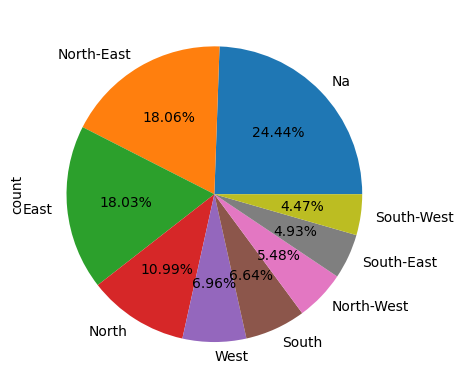

In [56]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [57]:
df.drop(columns=['facing'],inplace=True)

In [58]:
df.sample(5)

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
3020,3034,flat,godrej nature plus,sector 33,1.20,12000.0,2,2,3+,not available,3.0,Undefined,1111.0,0,0,0,0,0,0,"['Security / Fire Alarm', 'Intercom Facility',...",105
240,241,flat,ireo skyon,sector 60,3.75,13393.0,4,5,3,servant room,15.0,Relatively New,2534.0,0,1,0,0,0,0,"['Centrally Air Conditioned', 'Water purifier'...",167
933,937,flat,signature the roselia,sector 95,0.45,7909.0,2,2,2,not available,2.0,New Property,632.0,0,0,0,0,0,2,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",31
2707,2720,flat,orris aster court premier,sector 85,1.49,5820.0,4,5,3+,servant room,10.0,Relatively New,2017.0,0,1,0,0,0,2,"['Lift(s)', 'Maintenance Staff', 'Water Storag...",84
557,560,flat,laxmi apartment sector 99a gurgaon,sector 99a,0.30,4615.0,2,2,1,not available,4.0,New Property,600.0,0,0,0,0,0,0,"['Security / Fire Alarm', 'Intercom Facility',...",44


In [63]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
additionalRoom     0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
features_list      0
luxury_score       0
dtype: int64

In [65]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
138,138,flat,NaN,sector 78,0.6,3692.0,2,2,0,not available,0.0,Under Construction,1625.0,0,0,0,0,0,0,[],0


In [66]:
df.drop(index=[138],inplace=True)

In [67]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
additionalRoom     0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
features_list      0
luxury_score       0
dtype: int64

### agePossession


In [68]:
df['agePossession'].value_counts()

agePossession
Relatively New        1634
New Property           590
Moderately old         553
Undefined              473
Old Property           302
Under Construction     129
undefined                1
Name: count, dtype: int64

In [69]:
df[df['agePossession'] == 'Undefined']

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
1,1,house,satya the hermitage,sector 103,3.15,6702.0,4,5,0,not available,12.0,Undefined,4700.0,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
16,16,house,independent,sector 28,4.50,13889.0,4,4,0,not available,4.0,Undefined,3240.0,0,0,0,0,0,0,[],0
24,24,flat,mrg world ultimus,sector 90,0.50,6983.0,2,2,2,not available,1.0,Undefined,796.0,0,0,0,0,0,0,"['Lift(s)', 'Maintenance Staff', 'Water Storag...",21
32,32,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,not available,6.0,Undefined,750.0,0,0,0,0,0,0,[],0
41,41,flat,essel towers,sector 14,2.20,12500.0,3,4,3+,not available,3.0,Undefined,1956.0,0,0,0,0,0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,3658,flat,pivotal devaan apartments,sector 84,0.39,6500.0,2,2,0,not available,5.0,Undefined,549.0,0,0,0,0,0,0,[],0
3648,3668,flat,mrg skyline,sector 106,1.82,13392.0,3,2,2,not available,4.0,Undefined,1359.0,0,0,0,0,0,0,[],0
3653,3673,flat,shapoorji pallonji joyville gurugram,sector 102,1.05,11475.0,2,2,2,not available,0.0,Undefined,1017.0,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Security / F...",49
3668,3688,flat,ramprastha the edge towers,sector 37d,1.10,5528.0,3,3,3,not available,9.0,Undefined,1990.0,0,0,0,0,0,0,"['Temple', 'Swimming Pool', 'Bar/Chill-Out Lou...",63


In [70]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [71]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [72]:
df['agePossession'].value_counts()

agePossession
Relatively New        1829
New Property           672
Moderately old         601
Old Property           339
Under Construction     131
Undefined              109
undefined                1
Name: count, dtype: int64

In [73]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [74]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [75]:
df['agePossession'].value_counts()

agePossession
Relatively New        1848
New Property           701
Moderately old         608
Old Property           353
Under Construction     131
Undefined               40
undefined                1
Name: count, dtype: int64

In [76]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [77]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [78]:
df['agePossession'].value_counts()

agePossession
Relatively New        1861
New Property           701
Moderately old         635
Old Property           353
Under Construction     131
undefined                1
Name: count, dtype: int64

In [79]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
additionalRoom     0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
features_list      0
luxury_score       0
dtype: int64

In [80]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [81]:
df.shape

(3682, 21)